# 1.1 Linear Regression

## Question 1. 

### Part A.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generating data 
x = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([3, 2, 0, 5]).reshape(-1, 1)

In [2]:
# Solves for W, given X and y
# W = inv(X.T*X)*X.T*y
def weights_calculator(x_poly, y):
    w = np.linalg.inv(np.matmul(x_poly.T, x_poly))
    w = np.matmul(w, x_poly.T)
    w = np.matmul(w, y)
    return w

In [4]:
# Calculating weights for each k = 1, ..., 4
basis = np.array([1+x-x, x, x**2, x**3])
w1 = weights_calculator(basis[0], y)
print("W at k=1: \n", w1)

w2 = weights_calculator(basis[:2, :4].reshape(2, 4).T, y)
print("W at k=2: \n", w2)

w3 = weights_calculator(basis[:3, :4].reshape(3, 4).T, y)
print("W at k=3: \n", w3)

w4 = weights_calculator(basis[:4, :4].reshape(4, 4).T, y)
print("W at k=4: \n", w4)

W at k=1: 
 [[2.5]]
W at k=2: 
 [[1.5]
 [0.4]]
W at k=3: 
 [[ 9. ]
 [-7.1]
 [ 1.5]]
W at k=4: 
 [[-5.        ]
 [15.16666667]
 [-8.5       ]
 [ 1.33333333]]


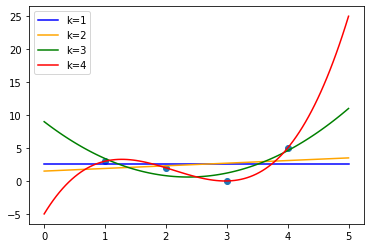

In [5]:
# Using smooth_x to generate a smooth plot
smoothx = np.linspace(0, 5, 100)
smoothx_basis = np.array([1+smoothx-smoothx, smoothx, smoothx**2, smoothx**3])

# Defining plots in terms of polynomial fit equations found
y1 = np.dot(w1.T, smoothx_basis[:1, :100])
y2 = np.dot(w2.T, smoothx_basis[:2, :100])
y3 = np.dot(w3.T, smoothx_basis[:3, :100])
y4 = np.dot(w4.T, smoothx_basis[:4, :100])

plt.scatter(x, y)
plt.plot(smoothx, y1.T, 'b', label = 'k=1')
plt.plot(smoothx, y2.T, 'orange', label = 'k=2')
plt.plot(smoothx, y3.T, 'g', label = 'k=3')
plt.plot(smoothx, y4.T, 'r', label = 'k=4')
plt.legend(loc = 'upper left')
plt.show()

### Part B.

As shown by the weights found at each k, the equations corresponding to the curves fitted for K are:
<br />
K=1
<br />
y = 2.5

K=2
<br />
y = 1.5+0.5x

K=3
<br />
y = 9-7.1x+1.5x<sup>2</sup>

K=4
<br />
y = -5+15.17x-8.5x<sup>2</sup>+1.33x<sup>3</sup>

### Part C.

In [3]:
# Calculates MSE
def MSE_calc(x_poly, w, y):
    y_hat = np.matmul(x_poly, w)
    SSE = np.dot((y-y_hat).T, (y-y_hat))
    MSE = SSE/len(y)
    return MSE

In [7]:
# Calculating weights and MSE for k=1,...,4
w1 = weights_calculator(basis[0], y)
print("MSE at k=1: ", MSE_calc(basis[0], w1, y)[0])

w2 = weights_calculator(basis[:2, :4].reshape(2, 4).T, y)
print("MSE at k=2: ", MSE_calc(basis[:2, :4].reshape(2, 4).T, w2, y)[0])

w3 = weights_calculator(basis[:3, :4].reshape(3, 4).T, y)
print("MSE at k=3: ", MSE_calc(basis[:3, :4].reshape(3, 4).T, w3, y)[0])

w4 = weights_calculator(basis[:4, :4].reshape(4, 4).T, y)
print("MSE at k=4: ", MSE_calc(basis[:4,:4].reshape(4, 4).T, w4, y)[0]) 

MSE at k=1:  [3.25]
MSE at k=2:  [3.05]
MSE at k=3:  [0.8]
MSE at k=4:  [7.11994299e-25]


## Question 2.

### Part A.

In [8]:
# Generating 30 data points
x = np.random.uniform(0, 1, 30)
error = np.random.normal(0, 0.07, 30)
g = np.sin(2*np.pi*x)**2+error

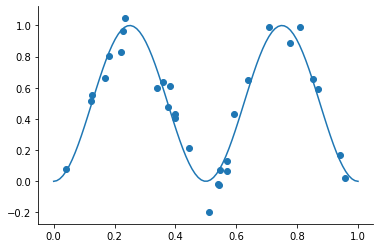

In [9]:
# Plotting generated data and sin2(2pi*x) curve
smoothx = np.linspace(0, 1, 100)
ysin = (np.sin(2*np.pi*smoothx))**2

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.scatter(x, g)
plt.plot(smoothx, ysin)
plt.show()

In [10]:
# Calculating basis, weights, and yhat for each k to plot curves over 100 points
basis = np.array([1+x-x, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, 
                  x**11, x**12, x**13, x**14, x**15, x**16, x**17, x**18]) 
smoothx_basis = np.array([1+smoothx-smoothx, smoothx, smoothx**2, smoothx**3, smoothx**4, 
                          smoothx**5, smoothx**6, smoothx**7, smoothx**8, smoothx**9, 
                          smoothx**10, smoothx**11, smoothx**12, smoothx**13, smoothx**14, 
                          smoothx**15, smoothx**16, smoothx**17, smoothx**18])

x_poly2 = basis[:2, :30].reshape(2, 30).transpose()
w2 = weights_calculator(x_poly2, g)
y2 = np.dot(w2, smoothx_basis[:2, :100])

x_poly5 = basis[:5, :30].reshape(5, 30).transpose()
w5 = weights_calculator(x_poly5, g)
y5 = np.dot(w5, smoothx_basis[:5, :100])

x_poly10 = basis[:10, :30].reshape(10, 30).transpose()
w10 = weights_calculator(x_poly10, g)
y10 = np.dot(w10, smoothx_basis[:10, :100])

x_poly14 = basis[:14, :30].reshape(14, 30).transpose()
w14 = weights_calculator(x_poly14, g)
y14 = np.dot(w14, smoothx_basis[:14, :100])

x_poly18 = basis[:18, :30].reshape(18, 30).transpose()
w18 = weights_calculator(x_poly18, g)
y18 = np.dot(w18, smoothx_basis[:18, :100])

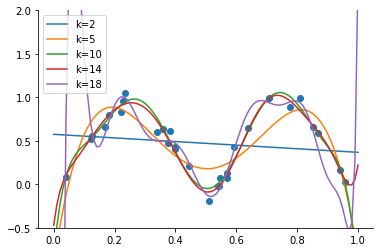

In [11]:
# Plot of curves for each k
plt.scatter(x, g)
plt.plot(smoothx, y2, label = 'k=2')
plt.plot(smoothx, y5, label = 'k=5')
plt.plot(smoothx, y10, label = 'k=10')
plt.plot(smoothx, y14, label = 'k=14')
plt.plot(smoothx, y18, label = 'k=18')
plt.legend(loc = 'upper left')
plt.ylim(-0.5, 2)
plt.show()

### Part B.

In [12]:
# Calculating weights and MSE for each k = 1, ..., 18
MSE = []
wArr = []
for k in range(0, 18):
    x_poly = basis[:k, :30].reshape(k, 30).T
    w = weights_calculator(x_poly, g)
    wArr.append(w)
    MSE.append(MSE_calc(x_poly, w, g))

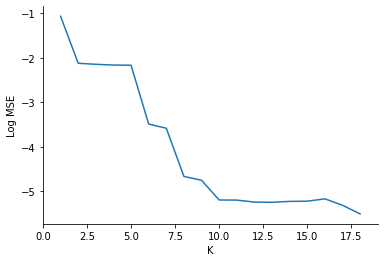

In [13]:
# Plotting train log MSE for each k
MSE = np.array(MSE)
LogMSE = np.log(MSE) 

plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Log MSE')
plt.show()

### Part C.

In [14]:
# Generating 1000 test points and basis
x = np.random.uniform(0, 1, 1000)
error = np.random.normal(0, 0.07, 1000)
g = np.sin(2*np.pi*x)**2+error
basis = np.array([1+x-x, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, 
                  x**12, x**13, x**14, x**15, x**16, x**17, x**18]) 

In [15]:
# Calculating MSE at each k=1,...,18 for test data
MSE = []
for k in range(0, 18):
    x_poly = basis[:k, :1000].reshape(k, 1000).T
    w = wArr[k]
    MSE.append(MSE_calc(x_poly, w, g))

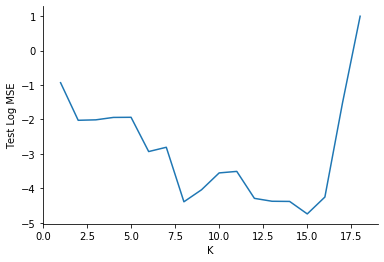

In [16]:
# Plotting test log MSE for each k = 1, ... , 18
MSE = np.array(MSE)
LogMSE = np.log(MSE) 

plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Test Log MSE')
plt.show()

### Part D.

In [4]:
# Part B
# Generating data and calculating weights and MSE over 100 runs
MSE = np.zeros(18)
for i in range(0, 100):
    wArr = []
    x = np.random.uniform(0, 1, 30)
    error = np.random.normal(0, 0.07, 30)
    g = np.sin(2*np.pi*x)**2+error
    basis = np.array([1+x-x, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11,
                      x**12, x**13, x**14, x**15, x**16, x**17, x**18]) 
    
    for k in range(0, 18):
        x_poly = basis[:k, :30].reshape(k, 30).T
        w = weights_calculator(x_poly, g)
        wArr.append(w)
        MSE[k] = MSE[k]+MSE_calc(x_poly, w, g)
    
MSE = np.array(MSE)
MSE = MSE/100
LogMSE = np.log(MSE)

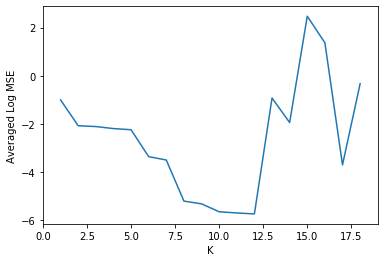

In [5]:
# Plotting average log MSE for k = 1, ..., 18
plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Averaged Log MSE')
plt.show()

In [6]:
# Part C
# Generating data and calculating weights and MSE over 100 runs
MSE = np.zeros(18)
for i in range(0, 100):
    x = np.random.uniform(0, 1, 1000)
    error = np.random.normal(0, 0.07, 1000)
    g = np.sin(2*np.pi*x)**2+error
    basis = np.array([1+x-x, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, 
                      x**12, x**13, x**14, x**15, x**16, x**17, x**18])
    
    for k in range(0, 18):
        x_poly = basis[:k, :1000].reshape(k, 1000).T
        w = wArr[k]
        MSE[k] = MSE[k]+ MSE_calc(x_poly, w, g)
 
MSE = np.array(MSE)
MSE = MSE/100
LogMSE = np.log(MSE)

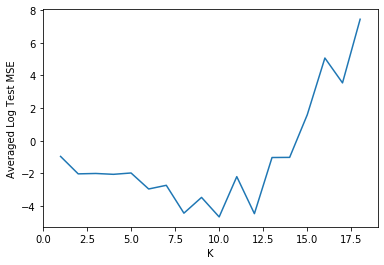

In [7]:
# Plotting average test log MSE for k=1, ..., 18
plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Averaged Log Test MSE')
plt.show()

## Question 3.

### Part B.

In [21]:
# Generating 30 data points
x = np.random.uniform(0, 1, 30)
error = np.random.normal(0, 0.07, 30)
g = np.sin(2*np.pi*x)**2+error
basis = np.array([np.sin(1*math.pi*x), np.sin(2*math.pi*x), np.sin(3*math.pi*x), 
                  np.sin(4*math.pi*x), np.sin(5*math.pi*x), np.sin(6*math.pi*x), 
                  np.sin(7*math.pi*x), np.sin(8*math.pi*x), np.sin(9*math.pi*x), 
                  np.sin(10*math.pi*x), np.sin(11*math.pi*x), np.sin(12*math.pi*x), 
                  np.sin(13*math.pi*x), np.sin(14*math.pi*x),np.sin(15*math.pi*x), 
                  np.sin(16*math.pi*x), np.sin(17*math.pi*x), np.sin(18*math.pi*x)]) 


In [22]:
# Calculating weights and MSE for each k=1,...,18
MSE = []
wArr = []
for k in range(0, 18):
    x_poly = basis[:k, :30].reshape(k, 30).T
    w = weights_calculator(x_poly, g)
    wArr.append(w)
    MSE.append(MSE_calc(x_poly, w, g))
    
LogMSE = np.log(MSE)

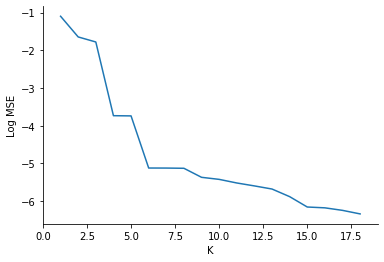

In [23]:
# Plotting train log MSE for each k
plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Log MSE')
plt.show()

### Part C.

In [24]:
# Generating 1000 test points and basis
x = np.random.uniform(0, 1, 1000)
error = np.random.normal(0, 0.07, 1000)
g = np.sin(2*np.pi*x)**2+error
basis = np.array([np.sin(1*math.pi*x), np.sin(2*math.pi*x), np.sin(3*math.pi*x),
                  np.sin(4*math.pi*x), np.sin(5*math.pi*x), np.sin(6*math.pi*x),
                  np.sin(7*math.pi*x), np.sin(8*math.pi*x), np.sin(9*math.pi*x),
                  np.sin(10*math.pi*x), np.sin(11*math.pi*x), np.sin(12*math.pi*x),
                  np.sin(13*math.pi*x), np.sin(14*math.pi*x), np.sin(15*math.pi*x),
                  np.sin(16*math.pi*x), np.sin(17*math.pi*x), np.sin(18*math.pi*x)]) 


In [25]:
# Calculating MSE at each k=1, ..., 18 for test data
MSE = []
for k in range(0, 18):
    x_poly = basis[:k, :1000].reshape(k, 1000).T
    w = wArr[k]
    MSE.append(MSE_calc(x_poly, w, g))

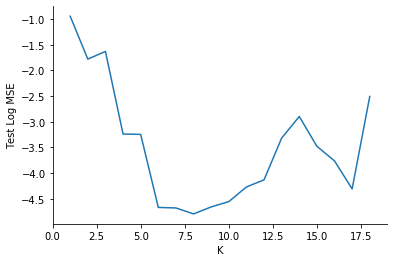

In [26]:
# Plotting test log MSE for each k=1, ..., 18
LogMSE = np.log(MSE) 

plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Test Log MSE')
plt.show()

### Part D.

In [27]:
# Part B
# Generating data and calculating weights and MSE over 100 runs
MSE = np.zeros(18)
for i in range(0, 100):
    wArr = []
    x = np.random.uniform(0, 1, 30)
    error = np.random.normal(0, 0.07, 30)
    g = np.sin(2*np.pi*x)**2+error
    basis = np.array([np.sin(1*math.pi*x), np.sin(2*math.pi*x), np.sin(3*math.pi*x), 
                      np.sin(4*math.pi*x), np.sin(5*math.pi*x), np.sin(6*math.pi*x),
                      np.sin(7*math.pi*x), np.sin(8*math.pi*x), np.sin(9*math.pi*x),
                      np.sin(10*math.pi*x), np.sin(11*math.pi*x), np.sin(12*math.pi*x),
                      np.sin(13*math.pi*x), np.sin(14*math.pi*x), np.sin(15*math.pi*x),
                      np.sin(16*math.pi*x), np.sin(17*math.pi*x), np.sin(18*math.pi*x)]) 

    for k in range(0, 18):
        x_poly = basis[:k, :30].reshape(k, 30).T
        w = weights_calculator(x_poly, g)
        wArr.append(w)
        MSE[k] = MSE[k]+MSE_calc(x_poly, w, g)
    
MSE = np.array(MSE)
MSE = MSE/100
LogMSE = np.log(MSE)

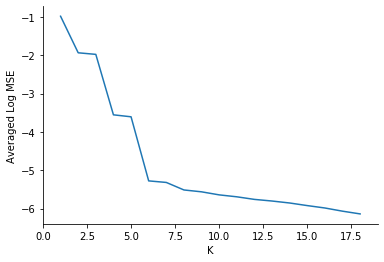

In [28]:
# Plotting average log MSE for k=1, ..., 18
plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Averaged Log MSE')
plt.show()

In [29]:
# Part C
# Generating 1000 test points and basis
MSE = np.zeros(18)
for i in range(0, 18):
    x = np.random.uniform(0, 1, 1000)
    error = np.random.normal(0, 0.07, 1000)
    g = np.sin(2*np.pi*x)**2+error
    basis = np.array([np.sin(1*math.pi*x), np.sin(2*math.pi*x), np.sin(3*math.pi*x),
                      np.sin(4*math.pi*x), np.sin(5*math.pi*x), np.sin(6*math.pi*x),
                      np.sin(7*math.pi*x), np.sin(8*math.pi*x), np.sin(9*math.pi*x),
                      np.sin(10*math.pi*x), np.sin(11*math.pi*x), np.sin(12*math.pi*x),
                      np.sin(13*math.pi*x), np.sin(14*math.pi*x), np.sin(15*math.pi*x),
                      np.sin(16*math.pi*x), np.sin(17*math.pi*x), np.sin(18*math.pi*x)]) 

    for k in range(0, 18):
        x_poly = basis[:k, :1000].reshape(k, 1000).T
        w = wArr[k]
        MSE[k] = MSE[k]+ MSE_calc(x_poly, w, g)
 
MSE = MSE/100
LogMSE = np.log(MSE)

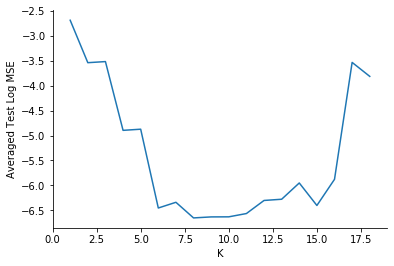

In [30]:
# Plotting average test log MSE for k=1,...,18
plt.figure()
plt.plot(list(range(1, 19)), LogMSE)
plt.xlim(0, 19)
plt.xlabel('K')
plt.ylabel('Averaged Test Log MSE')
plt.show()

# 1.2 Filtered Boston housing and kernels

## Question 4.

### Part A. Naive Linear Regression

In [31]:
# Importing Data
file = open('Boston-filtered.txt','r')
boston = file.read().split('\n')
boston = np.array(boston)

In [32]:
# Data preprocessing
bostonarr = []
for b in range(0, 507):
    subarr = []
    iter = [m.start() for m in re.finditer(',', boston[b])]
    for i in range(0, len(iter)):
        if i == 0:
            subarr.append(boston[b][0:iter[0]])
        else:
            subarr.append(boston[b][iter[i-1]+1:iter[i]])
    subarr.append(boston[b][iter[i]+1:len(boston[b])])
    bostonarr.append(subarr)

In [33]:
# Creating x and y
y = []
X = []
for j in range(1, 506):
    y.append(bostonarr[j][12])
    X.append(bostonarr[j][0:12])
X = np.array(X)
y = np.array(y)

In [34]:
# Splitting the data into 2/3 train set and 1/3 test set
def traintestsplit(X, y):
    randsamp = np.random.rand(X.shape[0])
    split = randsamp < np.percentile(randsamp, 66)
    X_train = X[split].astype(np.float)
    y_train = y[split].astype(np.float) 
    X_test =  X[~split].astype(np.float) 
    y_test = y[~split].astype(np.float)
    return X_train, y_train, X_test, y_test

In [35]:
# Naive Regression over 20 runs with random splits 
MSE = []
testMSE = []
for r in range(0, 20):
    # Train
    X_train, y_train, X_test, y_test = traintestsplit(X, y)    
    basis = np.ones((len(X_train), 1))
    x_poly = basis
    w = weights_calculator(x_poly, y_train)
    MSE.append(MSE_calc(x_poly, w, y_train))
    
    # Test
    testbasis = np.ones((len(X_test), 1))
    testMSE.append(MSE_calc(testbasis, w, y_test))

In [36]:
# Calculating mean and std of train and test MSE
MSE = np.array(MSE)
testMSE = np.array(testMSE)
print("Train MSE mean ", np.mean(MSE), " and std ", np.std(MSE))
print("Test MSE mean ", np.mean(testMSE), " and std ", np.std(testMSE))

Train MSE mean  85.98908951293636  and std  4.288500408027889
Test MSE mean  81.3886473052772  and std  8.31004101058637


### Part B.

A simple interpretation of the function 'a' above is that it is the equivalent to having a basis of {1} at k=1 polynomial regression. It linearly fits the data with the line y=c resulting in the least error.

### Part C. Linear Regression with single attributes

In [37]:
# Linear Regression with single attributes over 20 runs with random splits
MSE=[]
testMSE=[]
for a in range(0, 12):
    attrMSE = []
    testattrMSE = []
    for i in range (0, 20):
        # Train
        X_train, y_train, X_test, y_test = traintestsplit(X, y)
        basis = X_train[:, a].reshape(len(X_train), 1) # using ath attribute for linear regression
        ones = np.ones((len(X_train), 1))
        basis = np.c_[basis, ones]
        x_poly = basis.reshape(len(X_train), 2) # adding to first dimension because of bias
        w = weights_calculator(x_poly, y_train)
        attrMSE.append(MSE_calc(x_poly, w, y_train))
   
        # Test
        basis = X_test[:, a].reshape(len(X_test), 1) # using ath attribute for linear regression
        ones = np.ones((len(X_test), 1))
        basis = np.c_[basis, ones]
        x_poly = basis.reshape(len(X_test), 2)
        testattrMSE.append(MSE_calc(x_poly, w, y_test))
        
    MSE.append(attrMSE)
    testMSE.append(testattrMSE)

In [38]:
# Calculating mean and std of train and test MSE for each attribute
for i in range(0, 12):
    print("Attribute ", i+1)
    print("Train MSE mean ", np.mean(np.array(MSE[i])), 
          " and std ", np.std(np.array(MSE[i])))
    print("Test MSE mean ", np.mean(np.array(testMSE[i])), 
          " and std ", np.std(np.array(testMSE[i])))

Attribute  1
Train MSE mean  72.99857745182797  and std  4.330458533276968
Test MSE mean  69.99836835712644  and std  8.666481512552815
Attribute  2
Train MSE mean  72.57246065011587  and std  4.995599885966074
Test MSE mean  75.61062718169481  and std  9.6423210807663
Attribute  3
Train MSE mean  63.07192670247637  and std  5.808790962716219
Test MSE mean  68.03422546353478  and std  11.522838199588177
Attribute  4
Train MSE mean  80.25449921537742  and std  2.3641453640367764
Test MSE mean  85.49137859026072  and std  4.584631291294853
Attribute  5
Train MSE mean  65.63580458202375  and std  4.951565782473121
Test MSE mean  75.72642743295594  and std  9.693171426283442
Attribute  6
Train MSE mean  43.10855301459978  and std  3.8021856205002953
Test MSE mean  44.86076911210445  and std  7.28533491326763
Attribute  7
Train MSE mean  71.19012107951185  and std  5.335247299482511
Test MSE mean  75.07084117694848  and std  10.359837966765227
Attribute  8
Train MSE mean  78.28956339972811 

### Part D. Linear Regression using all attributes

In [39]:
# Linear Regression with all attributes over 20 runs with random splits
MSE = []
testMSE = []
for r in range(0, 20):
    # Train
    X_train, y_train, X_test, y_test = traintestsplit(X, y)
    ones = np.ones((len(X_train), 1))
    basis = np.c_[X_train, ones]
    x_poly = basis.reshape(len(X_train), 13)
    w = weights_calculator(x_poly, y_train)
    MSE.append(MSE_calc(x_poly, w, y_train))

    # Test
    ones = np.ones((len(X_test), 1))
    basis = np.c_[X_test, ones]
    x_poly = basis.reshape(len(X_test), 13)
    testMSE.append(MSE_calc(x_poly, w, y_test))
    
MSE = np.array(MSE)
testMSE = np.array(testMSE)

In [40]:
# Calculating mean and std of train and test MSE for all attribute
print("Train MSE mean ", np.mean(MSE), " and std ", np.std(MSE))
print("Test MSE mean ", np.mean(testMSE), " and std ", np.std(testMSE))

Train MSE mean  22.157127702075663  and std  2.068324741664647
Test MSE mean  23.89593931121981  and std  5.194891694179792


# 1.3 Kernelized Ridge Regression

## Question 5.

### Part A.

In [41]:
# Creating gamma and sigma values
gamma = []
sigma = []
for i in range(-40, -25):
    gamma.append(2**i)
for j in np.arange(7, 13.5, 0.5):
    sigma.append(2**j)

In [42]:
# Creating 5-fold train-test split
def split(x):
    s = int(len(x)/5)
    ind = np.arange(len(x)).astype(int)
    train_index = np.zeros((5, len(x)-s))
    test_index = np.zeros((5, s))
    for i in range(0, 5):
        test_index[i] = ind[0+i*s:0+(i+1)*s]
        train_index[i] = np.delete(ind, test_index[i])
        
    return train_index, test_index

In [43]:
# Calculating kernel matrix for X and sigma
def K_calc(Xi, Xj, sigma1):
    K = np.zeros(((len(Xi)), len(Xj)))
    for i in range(0, len(Xi)):
        for j in range(0, len(Xj)):
            t = Xi[i]-Xj[j]
            t = np.linalg.norm(t)
            t = -(t**2)/(2*(sigma1**2))
            t = math.exp(t)
            K[i][j]=t
    return K

In [44]:
# Calculating alpha for kernel and gamma
def alpha_calc(K, gamma1, X, y):
    alpha = np.add(K, (gamma1*len(X)*np.identity(len(X))))
    alpha = np.linalg.inv(alpha)
    alpha = np.matmul(alpha, y)
    return alpha

In [45]:
# Single hyperparameter search over sigma and gamma values using 5-fold cross validation
MSE = np.zeros((13, 15))
testMSE = np.zeros((13, 15))
for s in range(0, 13):
    for g in range(0, 15):
        trainfoldMSE = 0
        testfoldMSE = 0
        train_in, test_in = split(X_train)
        # Iterating over 5 folds
        for i in range(0, 5):
            # Creating folds
            train_index = train_in[i].astype(int)
            test_index = test_in[i].astype(int)
            
            # Train
            X_trainfold = X_train[train_index[0]:train_index[len(train_index)-1]]
            y_trainfold = y_train[train_index[0]:train_index[len(train_index)-1]]      
            sigma1 = sigma[s]
            K = K_calc(X_trainfold, X_trainfold, sigma1)         
            gamma1 = gamma[g]
            alpha = alpha_calc(K, gamma1, X_trainfold, y_trainfold) 
            trainfoldMSE = trainfoldMSE+(MSE_calc(alpha, K, y_trainfold))
            
            # Test   
            X_testfold = X_train[test_index[0]:test_index[len(test_index)-1]]
            y_testfold = y_train[test_index[0]:test_index[len(test_index)-1]]
            Kt = K_calc(X_trainfold, X_testfold, sigma1)   
            testfoldMSE = testfoldMSE+(MSE_calc(alpha, Kt, y_testfold))
        
        # Average MSE over the 5 folds
        MSE[s][g] = trainfoldMSE/5
        testMSE[s][g] = testfoldMSE/5

/Users/Administrator/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [46]:
# Finding sigma and gamma for minimum MSE
mintrainMSE = np.amin(MSE)
minindex1 = np.where(MSE == mintrainMSE)
print(mintrainMSE, minindex1)

mintestMSE = np.amin(testMSE)
minindex2 = np.where(testMSE == mintestMSE)
print(mintestMSE, minindex2)

0.5119703639386777 (array([0]), array([0]))
6.654668827389557 (array([4]), array([0]))


In [47]:
print("Optimal sigma and gamma: ", sigma[4], gamma[0])

Optimal sigma and gamma:  181.01933598375618 3.725290298461914e-09


### Part B.

In [48]:
# Creating plot data
KMSE = MSE
KtestMSE = testMSE

xdata = []
ydata = []
zdata = []
for j in range(0, 13):
    for i in range(0, 15):
        xdata.append(sigma[j])
        ydata.append(gamma[i])
        zdata.append(testMSE[j][i])

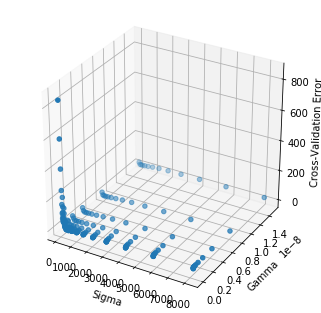

In [49]:
# Plotting 3D cross-validation error for sigma and gamma values
fig = plt.figure()
fig.set_size_inches(5.5, 5.5)
ax = fig.add_subplot(projection = '3d')
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel('Sigma')
ax.set_ylabel('Gamma')
ax.set_zlabel("Cross-Validation Error")
plt.show()

### Part C.

In [50]:
# Calculating kernel, alpha, and single train MSE with optimal sigma and gamma
sigma1 = sigma[4]
gamma1 = gamma[0]
K = K_calc(X_train, X_train, sigma1)
alpha = alpha_calc(K, gamma1, X_train, y_train)
MSE = MSE_calc(alpha, K, y_train)

In [51]:
print("Train MSE with optimal sigma and gamma: ", MSE)

Train MSE with optimal sigma and gamma:  5.244796056503648


In [52]:
# Calculating kernel and single test MSE with optimal sigma and gamma
sigma1 = sigma[4]
gamma1 = gamma[0]
K = K_calc(X_train, X_test, sigma1) 
testMSE = MSE_calc(alpha, K, y_test)

In [53]:
print("Test MSE with optimal sigma and gamma: ", testMSE)

Test MSE with optimal sigma and gamma:  12.086009535977583


### Part D.

In [54]:
# Hyperparameter search function
def sig_gam_search(sigma, gamma, X_train):
    MSE = np.zeros((13, 15))
    testMSE = np.zeros((13, 15))
    for s in range(0, 13):
        for g in range(0, 15):
            trainfoldMSE = 0
            testfoldMSE = 0
            train_in, test_in = split(X_train)
            # Iterating over 5 folds
            for i in range(0, 5):
                # Creating folds
                train_index = train_in[i].astype(int)
                test_index = test_in[i].astype(int)
                
                # Train
                X_trainfold = X_train[train_index[0]:train_index[len(train_index)-1]]
                y_trainfold = y_train[train_index[0]:train_index[len(train_index)-1]]
                sigma1 = sigma[s]
                K = K_calc(X_trainfold, X_trainfold, sigma1)
                gamma1 = gamma[g]
                alpha = alpha_calc(K, gamma1, X_trainfold, y_trainfold)
                trainfoldMSE = trainfoldMSE + (MSE_calc(alpha, K, y_trainfold))
                
                # Test
                X_testfold = X_train[test_index[0]:test_index[len(test_index)-1]]
                y_testfold = y_train[test_index[0]:test_index[len(test_index)-1]]
                Kt = K_calc(X_trainfold, X_testfold, sigma1)
                testfoldMSE = testfoldMSE+(MSE_calc(alpha, Kt, y_testfold))

            # Average MSE over the 5 folds
            MSE[s][g] = trainfoldMSE/5
            testMSE[s][g] = testfoldMSE/5
    
    # Finding minimum test MSE sigma and gamma        
    mintestMSE = np.amin(testMSE)
    minindex2 = np.where(testMSE == mintestMSE)
    
    return int(minindex2[0]), int(minindex2[1])

In [55]:
# Kernel Ridge Regression and hyperparameter search over 20 runs with random splits
MSE = []
testMSE = []
for r in range(0, 20):
    # Train
    X_train, y_train, X_test, y_test = traintestsplit(X, y)
    s1, g1 = sig_gam_search(sigma, gamma, X_train)
    sigma1 = sigma[s1]
    gamma1 = gamma[g1]  
    K = K_calc(X_train, X_train, sigma1)
    alpha = alpha_calc(K, gamma1, X_train, y_train)   
    MSE.append(MSE_calc(alpha, K, y_train))

    # Test
    K = K_calc(X_train, X_test, sigma1) 
    testMSE.append(MSE_calc(alpha, K, y_test))

/Users/Administrator/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


In [64]:
# Average train and test MSE and std over 20 runs
MSE = np.array(MSE)
testMSE = np.array(testMSE)
print("Train MSE mean ", np.mean(MSE), " and std ", np.std(MSE))
print("Test MSE mean ", np.mean(testMSE), " and std ", np.std(testMSE))

Train MSE mean  4.143337749108885  and std  1.8020261357851874
Test MSE mean  18.76443635059623  and std  6.356245087183766


| Method      | MSE train | MSE test |
| :-----------: | :-----------: | :-----------: |
| Naive Regression      | 85.98$\pm$4.28      | 81.38$\pm$8.31       |
| Linear Regression (attribute 1)   | 72.99$\pm$4.33        | 69.99$\pm$8.66        |
| Linear Regression (attribute 2)   | 72.57$\pm$4.99        | 75.61$\pm$9.64        |
| Linear Regression (attribute 3)   | 63.07$\pm$5.80       | 68.03$\pm$11.52        |
| Linear Regression (attribute 4)   | 80.25$\pm$2.36      | 85.49$\pm$4.58        |
| Linear Regression (attribute 5)   | 65.63$\pm$4.95        | 75.72$\pm$9.69        |
| Linear Regression (attribute 6)   | 43.10$\pm$3.80        | 44.86$\pm$7.28        |
| Linear Regression (attribute 7)   | 71.19$\pm$5.33      | 75.07$\pm$10.35        |
| Linear Regression (attribute 8)   | 78.28$\pm$4.49        | 81.09$\pm$8.60        |
| Linear Regression (attribute 9)   | 72.44$\pm$4.41        | 71.12$\pm$8.61        |
| Linear Regression (attribute 10)   | 65.50$\pm$4.75        | 66.18$\pm$9.25        |
| Linear Regression (attribute 11)   | 61.48$\pm$4.84        | 65.65$\pm$9.61        |
| Linear Regression (attribute 12)   | 39.28$\pm$2.63        | 36.13$\pm$5.01        |
| Linear Regression (all attributes)   | 22.15$\pm$2.06        | 23.89$\pm$5.19        |
| Kernel Ridge Regression   | 4.14$\pm$1.80        | 18.76$\pm$6.35        |